# chapter 16
虽然说我们已经学完了基于Python数据分析的大部分技能，但依旧要认真对待这一关。因为我们依然有非常重要的事情尚待完成。
![](./picture/16-1.png)
## Python数据分析知识总结
首先要对Python数据分析进行一个总复习，形成一个完整的知识框架。当你在后面拿到任何一个数据时，可以心怀不乱。  
再前面的学习中，我们了解了什么是数据分析：就是从数据里面寻求真正有价值的信息，并对实际的工作或者生活有一定的指导作用，这个过程就叫数据分析。  
由此，我们总结了数据分析的基本流程：  
![](./picture/16-2.png)
接下来，我们主要学习了Python最重要的数据分析工具包Pandas。  
在Pandas中，我们首先了解了它的两种数据结构，一个Series数据就是Excel中的一条数据，一个DataFrame数据就是Excel中的一张表。  
接着我们学习了，利用索引值以及切片我们可以获取两种数据结构的数据。  
示例代码如下：  

In [1]:
from pandas import Series
import pandas as pd
emp=['001','002','003','004','005','006']
name=['亚瑟', '后裔','小乔','哪吒' ,'虞姬','王昭君']
series = Series(data=name,index=emp)
# 获取多个不连续的数据
print('位置下标',series[[1,3]])
# 使用切片获取连续的数据
print('位置切片',series[0:3])

df_dict = {
 'name':['ZhangSan','LiSi','WangWu','ZhaoLiu'],
 'age':['18','20','19','22'],
 'weight':['50','55','60','80']
}
df = pd.DataFrame(data=df_dict,index=['001','002','003','004'])
print(df)
# 通过位置索引切片获取一行
print(df[0:1])
# 通过位置索引切片获取多行
print(df[1:3])
# 获取多行里面的某几列
print(df[1:3][['name','age']])

位置下标 002    后裔
004    哪吒
dtype: object
位置切片 001    亚瑟
002    后裔
003    小乔
dtype: object
         name age weight
001  ZhangSan  18     50
002      LiSi  20     55
003    WangWu  19     60
004   ZhaoLiu  22     80
         name age weight
001  ZhangSan  18     50
       name age weight
002    LiSi  20     55
003  WangWu  19     60
       name age
002    LiSi  20
003  WangWu  19


此处需要注意：我们自定的index值被叫做索引下标，没有设置index值时会有一个默认的值叫做位置下标。  
了解了如何获取数据之后，我们学习了如何利用Pandas读取本地csv和excel文件。  
使用pandas.read_excel()和pandas.read_csv()方法，在指定文件路径后便可读取数据。  
如果文件中包含多个数据表，可以通过sheet_name参数设置表的名字。  
在使用这两个方法读取文件的时候，会默认将文件中第一行数据作为列索引值，可以通过header参数设置。  
示例代码如下：  

In [2]:
import pandas as pd
# 将第一行设置成索引
people = pd.read_csv('./data/People1.csv',header = 0)

In [3]:
import pandas as pd
# 将第一行设置成索引
people = pd.read_csv('./data/People1.csv',header = None)

读取数据之后，我们应该对数据进行整理和清洗。  
在数据分析过程中，我们会有至少一半的时间都在整理和清洗数据。  
Pandas中使用NaN来表示空值（缺失值），空值再参与计算时并不会报错，因为NaN类型是Float类型，但是计算出的结果都是NaN，会影响我们的计算结果。  
所以，最好的方法就是含有空值的数据删除。  
示例代码如下：  
代码片段  
```
# 只要含有NaN的整行数据删掉
df.dropna()
# 想要删除整行都是空值的数据需要添加how='all'参数
df.dropna(how='all')
```
如果想要对列做删除操作，需要添加axis参数，axis=1表示列，axis=0表示行。  
对于数据量比较大的时候，我们建议使用dropna()进行删除，并不会影响整体分析结果。  
但是当我们的数据量比较少的时候，删除可能会影响整体分析结果，这时我们就可以使用填充的方式，对空值进行处理。  
可以使用fillna()方法对空值进行填充。  
```
df.fillna(value=None, method=None, axis=None, inplace=False, limit=None, downcast=None, **kwargs)
```
代码解释  
value：需要用什么值去填充缺失值。  
axis：确定填充维度，从行开始或是从列开始。  
method：   
1.ffill，用缺失值前面的一个值代替缺失值，如果axis =1，那么就是横向的前面的值替换后面的缺失值，如果axis=0，那么则是上面的值替换下面的缺失值。   
2.bfill，缺失值后面的一个值代替前面的缺失值。
limit：确定填充的个数，如果limit=2，则只填充两个缺失值。  
注意：method参数不能与value参数同时出现。  
处理好空值以后，我们还需要考虑重复数据对数据分析结果准确度的影响。  
重复数据比较多的时候，会降低分析的准确度，一会降低分析的效率。所以我们在整理数据的时候应该将重复的数据删除掉。  
可以使用duplicated()方法判断是否有重复的数据，返回的是一个值为Bool类型的Series。  
同时，我们也可以使用drop_duplicates()方法将重复数据进行删除。  
当我们分析的数据在多个表中时候，为了方便分析就需要我们将数据进行合并。  
数据合并主要包括下面两种操作：  
轴向连接（concatenation），pd.concat()可以沿一个轴将多个DataFrame对象连接在一起，形成一个新的DataFrame对象  
融合（merging），pd.merge()方法可以根据一个或多个键将不同DataFrame中的行连接起来  
同时，我们也可以用逻辑运算的方式对数据进行筛选。例如：  
```
# 准确获取到所有关注者超过100的用户数据
bools= df['关注者']>100
df1 = df[bools]
```
并且，可以使用sort_index()、sort_values()两个方法对数据进行排序，并且这两个方法Series和DataFrame都支持。  
俗话说“物以类聚，人以群分”，我们在分析的时候，一般会将数据进行分类，然后针对某一类数据进行具体分析。  
Pandas提供了一个灵活高效的groupby功能，它使你能以一种自然的方式对数据集进行切片、切块、摘要等操作。  
示例代码如下：  
代码片段  
```
import pandas as pd
df = pd.read_excel('/data/course_data/data_analysis/forbes_2018.xlsx')
# 根据gender列进行分组
groups = df.groupby('gender')
print(groups)
```
使用遍历，我们可以获取到每一组的数据信息：  
代码片段  
```
for group_name,group_df in groups:
    print(group_name,group_df.shape)
```
并且，可以分组后数据使用mean()、max()、min()等统计函数快速获取我们的指标值。  
pandas里常用的统计函数包括：  
统计函数  
count( )：统计列表中非空数据的个数  
nunique( )：统计非重复的数据的个数  
sum( )：统计列表中所有数值的和  
mean( )：计算列表中数据的平均值  
median( )：统计列表中数据的中位数  
max( )：求列表中数据的最大值  
min( )：求找列表中数据的最小值  
如果根据多列数据进行分组后，会出现多层索引情况。  


对于多层级Series的取值，可以直接使用[]的方式取值。  
示例代码如下：  
代码片段  
```
s['张三','期末']
s[:,'期中']
```
取值的方式我们可以根据剥洋葱原则，从外到内一层一层的剥。  
在对多层索引DataFrame的取值是，我们推荐使用loc()函数。  
示例代码：  
代码片段  
```
df.loc['张三','期中']
df.loc['张三'].loc['期中']
df.loc[('张三','期中'),:]
```
DataFrame和Series有一个同样的注意点，就是无法直接对二级索引直接进行索引，必须让二级索引变成一级索引后才能对其进行索引！  
在金融、经济、物理学等领域，都需要在多个时间点观测或者测量数据，这样就产生了关于时间序列的数据。  
我们在分析的时候，可以将时间列数据设置成数据的索引，然后选出一定时间段内的数据进行分析。  
代码示例如下：  
```
import pandas as pd
import numpy as np
time_index = pd.date_range('2019-01-01', periods=400)
time_data = np.random.randint(100,size=400)
date_time = pd.Series(data=time_data,index=time_index)
```
可以依据年份进行索引：  
代码片段  
date_time['2020']  
可以依据年和月进行索引：  
代码片段  
date_time['2019-10']  
可以使用时间戳进行切片获取数据  
代码片段  
date_time['2019-10-05':'2019-10-10']  
有的时候用csv导入到时间数据时，默认的是字符串的数据类型 ，当可视化的时候，会出现没有按时间先后顺序的方式绘图 ，所以需要将字符串解析为时间类型的数据类型。  
使用Pandas的to_datetime()方法可以将字符串形式的日期转换成时间格式。    
代码片段    
pd.to_datetime(arg,format=None)  
arg：需要修改的数据；format：数据的格式    
以上是我们对数据的获取以及整理的基本操作，俗话说：“文不如表，表不如图”，如果我们将海量的数据绘制成图，就可以让我们的数据更加直观的呈现，更具说服力。    
所以，我紧接着又学习了Python中另外一个库Matplotlib，它的功能非常强大，可以通过调用函数轻松方便地绘制数据分析中常见的各种图像，比如折线图、条形图、柱状图、散点图、饼图等。  
在Matplotlib的学习中我们首先要了解常见图形种类及意义。  
折线图：以折线的上升或下降来表示统计数量的增减变化的统计图  
特点：能够显示数据的变化趋势，反映事物的变化情况。(变化)  
散点图：用两组数据构成多个坐标点，考察坐标点的分布,判断两变量之间是否存在某种关联或总结坐标点的分布模式。  
特点：判断变量之间是否存在数量关联趋势,展示离群点(分布规律)  
柱状图：排列在工作表的列或行中的数据可以绘制到柱状图中。  
特点：绘制连离散的数据,能够一眼看出各个数据的大小,比较数据之间的差别。(统计/对比)  
直方图：由一系列高度不等的纵向条纹或线段表示数据分布的情况。 一般用横轴表示数据范围，纵轴表示分布情况。  
特点：绘制连续性的数据展示一组或者多组数据的分布状况(统计)  
饼图：用于表示不同分类的占比情况，通过弧度大小来对比各种分类。  
特点：分类数据的占比情况(占比)  
想要学好用好Matplotlib是特别简单的，前提就是要必须清楚的了解Matplotlib图像组成。  
![](./picture/16-4.png)
同时，我们还要清楚每种图形的绘制方法，折线图：plt.plot()；柱状图：plt.bar()；直方图：plt.hist()；散点图：plt.scatter();饼图：plt.pie()。  
在使用Matplotlib时候需要注意，Matplotlib画的图不显示中文，所以我们的处理方式是添加字体属性。  
示例代码如下：  


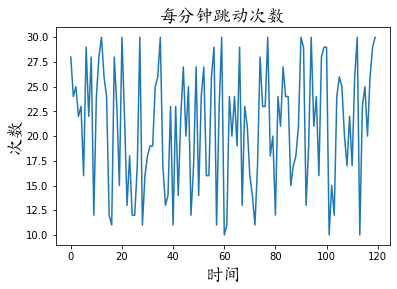

In [7]:
from matplotlib import pyplot as plt
from matplotlib import font_manager
import random
# 创建字体对象
my_font = font_manager.FontProperties(fname='./data/simkai.ttf',size=18)
x = range(0,120)
y = [random.randint(10,30) for i in range(120)]
# 添加字体属性
plt.ylabel("次数",fontproperties=my_font)
plt.xlabel("时间",fontproperties=my_font)
# 设置标题
plt.title('每分钟跳动次数',fontproperties=my_font)
plt.plot(x,y)
plt.show()

并且，我们还可以通过xticks()和yticks()自定义x轴和y轴的刻度值。  
下面我们总结一下Matplotlib常用的方法：  
![](./picture/16-5.png)
Seaborn和Matplotlib是Python最强大的两个可视化库。Seaborn其默认主题让人惊讶，而Matplotlib可以通过其多个分类为用户打造专属功能。  
Seaborn的底层是基于Matplotlib的，他们的差异有点像在点餐时选套餐还是自己点的区别，Matplotlib是独立点菜，可能费时费心（尤其是对我这  种选择困难症患者...）但最后上桌的菜全是特别适合自己的；而Seaborn是点套餐，特别简单，一切都是配好的，虽然省时省心，但可能套餐里总有些菜是不那么合自己口味的。
所以，在需要绘制图形的时候，我们可以根据自己的喜好自行选择。  
以上，就是我们整个Python数据分析基础内容。  
下面，我们来了解一下数据分析师需要还需要掌握哪些技能？  
俗话说“台上一分钟，台下十年功”。任何人取得的任何成就都不是一蹴而就的，学习之路更应如此，那么学习数据分析你需要的基本功是什么呢？  
千里之行，始于足下，数据分析，始于Excel。数据分析的第一步，就是能够使用Excel进行各种业务数据研究。  
数据分析中最常用的语言就是SQL，无论是数据的提取、转换，还是各种数据计算，SQL都是最好的武器。  
基础数学和统计学可以提高你的分析能力，了解为什么和在哪里使用平均值，中位数和模式。  
在数据可视化方面，除了Excel、matplotlib以外，还有一个常用的就是Tableau，通过简单的拖拽数据处理方式，迅速对数据进行初级透视。  
数据报告的撰写，是数据分析的最后一步，也是最重要的一步，好的分析报告是你升值加薪的法宝。  
以上，给大家提供了一些数据分析中要掌握的技能，以供大家后续的学习。  
## 结语
到此，我们的Python数据分析基础课就将告一段落了。  
我知道你在首次使用代码拿到数据的欣喜，我知道你初次接触Pandas时候的困惑，我知道你接触Matplotlib时的不解……  
因为，我们曾经都是一个初学者，与你经历过同样的过程。  
路漫漫其修远兮，数据分析的路还很长，重要的是坚持和练习。  
![](./picture/16-6.png)
“乘风破浪会有时，直挂云帆济沧海”，祝你在学习数据分析的道路上越走越远！  
“青山不改，绿水长流”，我们有缘江湖再会！  